In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_excel('Callspred.xlsx')

In [4]:
df.head()

,Date,Calls
0,2020-03-01,254
1,2020-03-02,227
2,2020-03-03,220
3,2020-03-04,220
4,2020-03-05,237


In [5]:
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,2020-03-01,254
1,2020-03-02,227
2,2020-03-03,220
3,2020-03-04,220
4,2020-03-05,237


In [6]:

# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [7]:

df.set_index('Month',inplace=True)

In [8]:
df.head()

,Sales
Month,
2020-03-01,254
2020-03-02,227
2020-03-03,220
2020-03-04,220
2020-03-05,237


In [9]:

df.describe()

,Sales
count,53.000000
mean,886.679245
std,592.857382
min,104.000000
25%,372.000000
50%,893.000000
75%,1341.000000
max,2753.000000


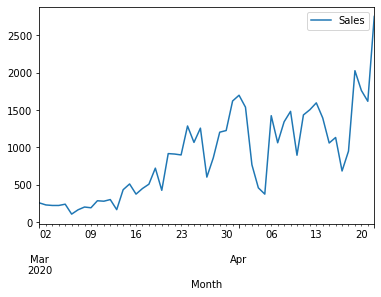

In [10]:
df.plot()

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
test_result=adfuller(df['Sales'])

In [13]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [15]:
adfuller_test(df['Sales'])

ADF Test Statistic : -0.668348529943129
p-value : 0.8547785471431268
#Lags Used : 11
Number of Observations Used : 41
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [26]:
df['D1']=df['Sales'].diff(1)

In [29]:
adfuller_test(df['D2'].dropna())

ADF Test Statistic : -3.5408496975682016
p-value : 0.006997912345467117
#Lags Used : 8
Number of Observations Used : 42
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


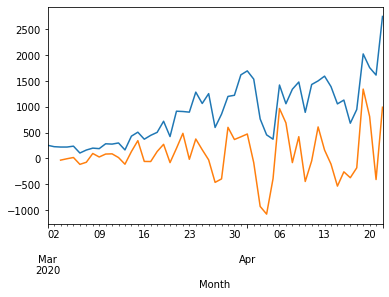

In [30]:
df['Sales'].plot()
df['D2'].plot()

In [91]:
df.head()

,Sales,D2,D7,D1,forecast,prediction
Month,,,,,,
2020-03-01,254,NaN,NaN,NaN,NaN,NaN
2020-03-02,227,NaN,NaN,-27.0,NaN,NaN
2020-03-03,220,-34.0,NaN,-7.0,NaN,NaN
2020-03-04,220,-7.0,NaN,0.0,NaN,NaN
2020-03-05,237,17.0,NaN,17.0,NaN,NaN


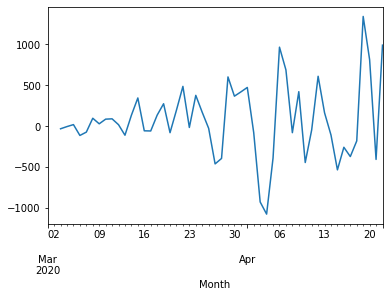

In [32]:
df['D2'].plot()

In [45]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

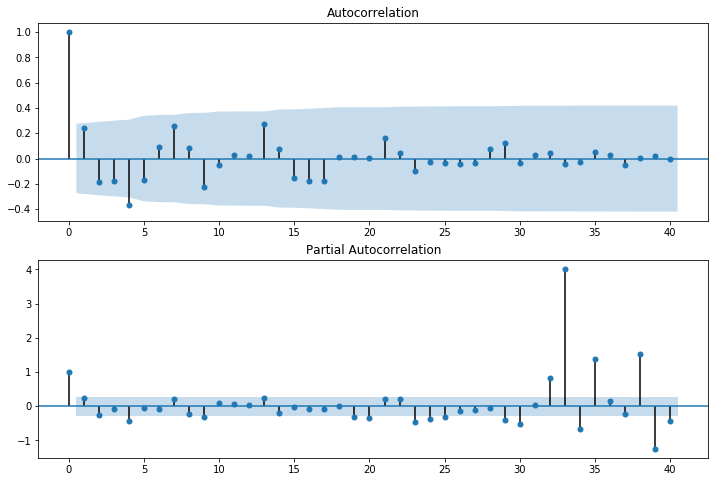

In [46]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['D2'].iloc[2:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['D2'].iloc[2:],lags=40,ax=ax2)

In [47]:
from statsmodels.tsa.arima_model import ARIMA

In [49]:
model=ARIMA(df['Sales'],order=(4,2,1))
model_fit=model.fit()

C:\Users\raikarak\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\raikarak\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [50]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Sales   No. Observations:                   51
Model:                 ARIMA(4, 2, 1)   Log Likelihood                -372.354
Method:                       css-mle   S.D. of innovations            339.117
Date:                Sat, 23 Jan 2021   AIC                            758.708
Time:                        16:13:55   BIC                            772.231
Sample:                    03-03-2020   HQIC                           763.876
                         - 04-22-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.5853      1.851      0.857      0.396      -2.042       5.213
ar.L1.D2.Sales    -0.2842      0.144     -1.971      0.055      -0.567      -0.002
ar.L2.D2.Sales    -0.2159      0.148     -1.458      0.152      -0.506       0.074
ar.L3.D2.Sales    -0.0142      0.146     -0.098      0.923      -0.300       0.272
ar.L4.D2.Sales    -0.3105      0.152     -2.045      0.047      -0.608      -0.013
ma.L1.D2.Sales    -1.0000      0.061    -16.310      0.000      -1.120      -0.880
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8669           -0.9035j            1.2521           -0.3717
AR.2           -0.8669           +0.9035j            1.2521            0.3717
AR.3            0.8440           -1.1584j            1.4333           -0.1498
AR.4            0.8440           +1.1584j            1.4333            0.1498
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

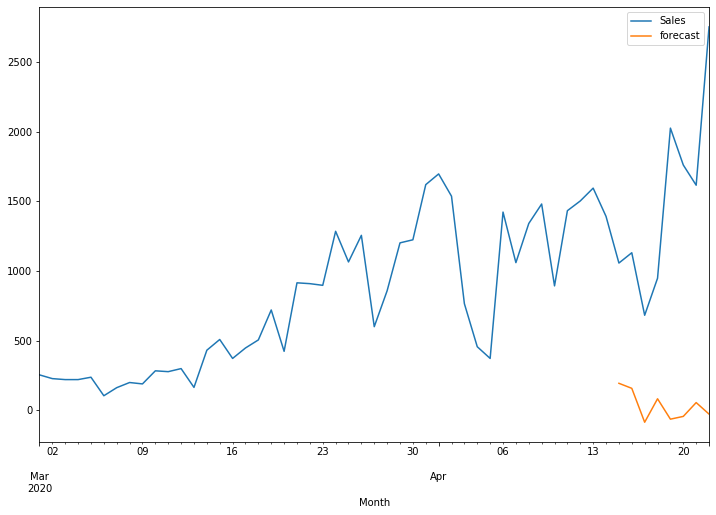

In [51]:
df['forecast']=model_fit.predict(start=45,end=54,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [59]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(4, 2, 1),seasonal_order=(4,2,0,2))
results=model.fit()

C:\Users\raikarak\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\raikarak\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


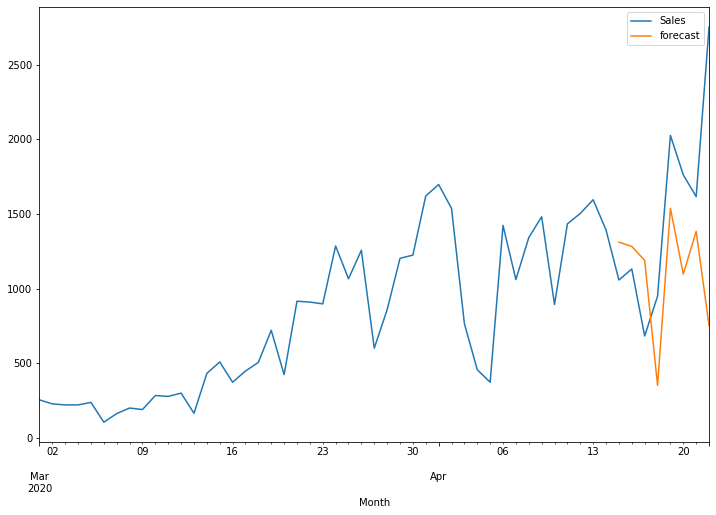

In [62]:
df['forecast']=results.predict(start=45,end=53,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [69]:
df.describe()

,Sales,Sales First Difference,D2,forecast
count,53.000000,52.000000,46.000000,8.000000
mean,886.679245,48.057692,206.369565,1544.156134
std,592.857382,373.470077,443.161589,263.874559
min,104.000000,-772.000000,-830.000000,1098.635850
25%,372.000000,-138.250000,-14.250000,1339.639313
50%,893.000000,22.000000,191.000000,1607.456887
75%,1341.000000,197.000000,384.500000,1752.587832
max,2753.000000,1137.000000,1696.000000,1826.542748


In [63]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(days=x)for x in range(0,30)]

In [64]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [66]:

future_df=pd.concat([df,future_datest_df])

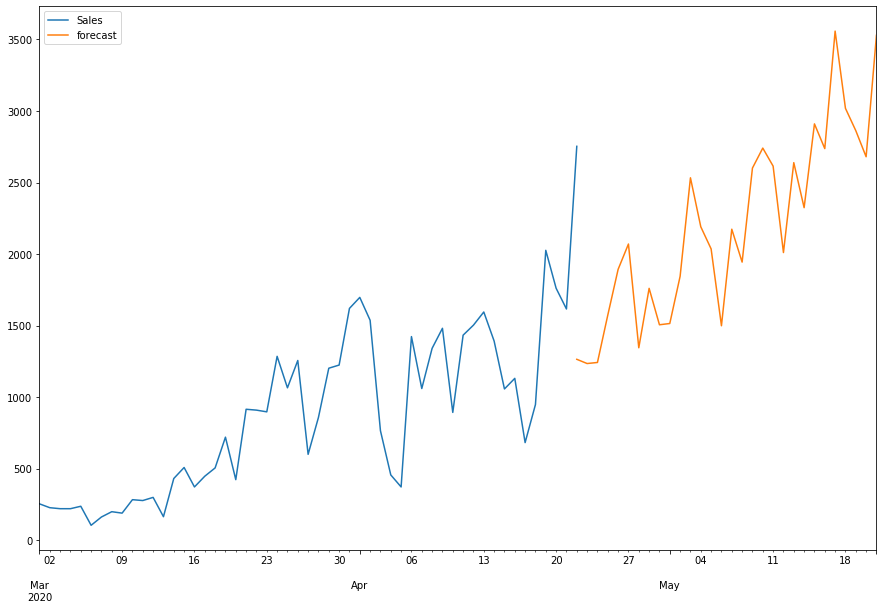

In [89]:
future_df['forecast'] = results.predict(start = 52, end = 90, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(15, 10))

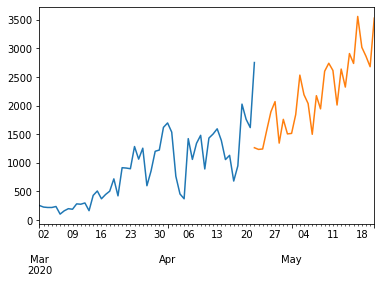

In [74]:
future_df['Sales'].plot()
future_df['forecast'].plot()

In [76]:
future_df.to_excel('Call data prediction Output.xlsx')